<a href="https://colab.research.google.com/github/RonaldManoelScientist/Reconhecimentodegeneroporvoz/blob/main/Reconhecimento_de_Voz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gender Voice 
**Objetivo:** Prever através de alguns modelos de machine learning se as frequencias de voz são de homens ou de mulher.

> No dataset presente possui algumas váriaveis por exemplo, frequência média das ondas, desvio padrão, modo da frequência e assim por diante, os modelos a serem testados são:

*   Regressão Logistica
*   Decision Tree
*   SVM
*   XGboost
*   Random Forest




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

voices = pd.read_csv('/content/drive/MyDrive/DataSet/Reconhecimento de Voz/voice.csv')

Após feitas as importações das bibliotecas e definido qual será o dataset, vamos analisar as primeiras cinco entradas do dataset

In [33]:
voices.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


Abaixo pode se encontrar as váriaveis que possuem no dataset com os seus respectivos significados:

### Variáveis
* `meanfreq:` mean frequency (in kHz)
* `sd:` standard deviation of frequency
* `median:` median frequency (in kHz)
* `Q25:` first quantile (in kHz)
* `Q75`: third quantile (in kHz)
* `IQR:` interquantile range (in kHz)
* `skew:` skewness (see note in specprop description)
* `kurt:` kurtosis (see note in specprop description)
* `sp.ent:` spectral entropy
* `sfm:` spectral flatness
* `mode:` mode frequency
* `centroid:` frequency centroid (see specprop)
* `peakf:` peak frequency (frequency with highest energy)
* `meanfun:` average of fundamental frequency measured across acoustic signal
* `minfun:` minimum fundamental frequency measured across acoustic signal
* `maxfun:` maximum fundamental frequency measured across acoustic signal
* `meandom:` average of dominant frequency measured across acoustic signal
* `mindom:` minimum of dominant frequency measured across acoustic signal
* `maxdom:` maximum of dominant frequency measured across acoustic signal
* `dfrange:` range of dominant frequency measured across acoustic signal
* `modindx:` modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
label: male or female

## Verificar as dimensões do Dataset

Algo que geralmente opto por fazer é verificar o todas as variáveis presentes em modo de lista para começar a ter alguns insights

In [2]:
voices.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

Em seguida é sempre útil verificar a presença de valores nulos, onde pode afetar ou até incapacitar os modelos de machine learning.

In [4]:
voices.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

## Q1. Quais as correlações existentes no dataset

Abaixo foi utilizado o método `LabelEncoder` que é essencial na tranformação de variáveis categoricas em númericas. Poderia ser executada atráves do loop `for` no entanto seria mais trabalhoso.

In [5]:
label_encoder = LabelEncoder()
voices['label'] = label_encoder.fit_transform(voices['label'])

Nessa etapa foi criada uma **matrix de correlação** onde passamos todos os valores do dataset, e através da biblioteca `numpy` são feitos os calculos matemáticos para se encontrar uma possível correlação

In [6]:
corr = voices[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']].corr()

display(corr)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,...,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,...,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,...,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,...,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,-0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,...,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,...,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,...,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,...,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,...,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,...,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,0.357499


Abaixo será plotado um **heatmap** da biblioteca `seaborn` com estruturação do `matplotlib` detalhe importante para a matrix de correlação não pode ser passados valores categoricos **somente numéricos** por isso foi essencial utilizar o `LabelEnconder `na váriavel `Label`

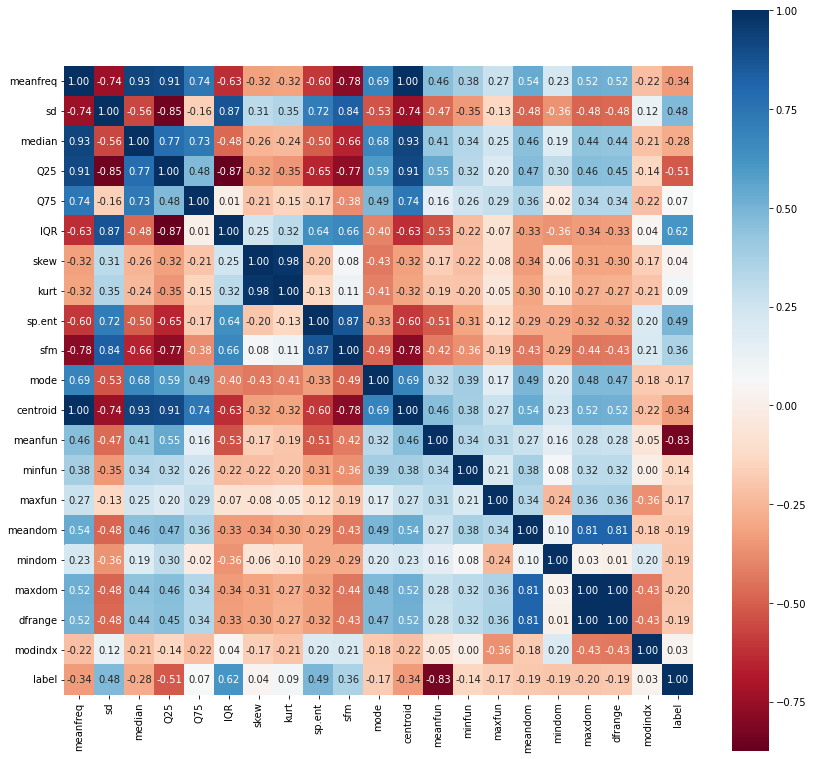

In [7]:
fig, ax = plt.subplots(figsize=(12,11))
ax = sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)
plt.tight_layout();

Abaixo apenas para ter certeza plotei mais uma matrix dessa vez considerando as **melhores correlações** com a váriavel target `Label`

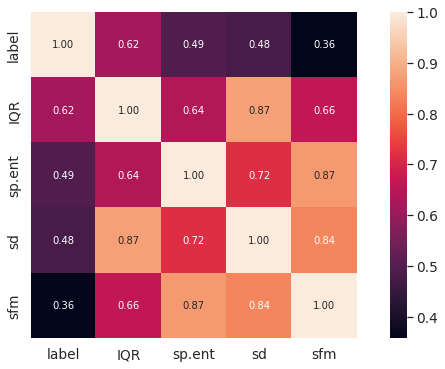

In [8]:
k= 5 # Número de valores para selecionar

plt.figure(figsize=(12,6)); # Selecionando o tamanho da figura/grafico

corrmat = voices.corr() # Montando a matriz correlação

# Plotando as 5 melhores correlações
cols = corrmat.nlargest(n=k,columns= 'label')['label'].index

# Matriz do coeficiente de correlação das variáveis.
matriz_correlacao = np.corrcoef(voices[cols].values.T)


# Montando grafico
sns.set(font_scale=1.25)

hm = sns.heatmap(data = matriz_correlacao, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

### Exploração das variáveis
Abaixo será plotado algumas distribuições para analisa como esses dados se comportam

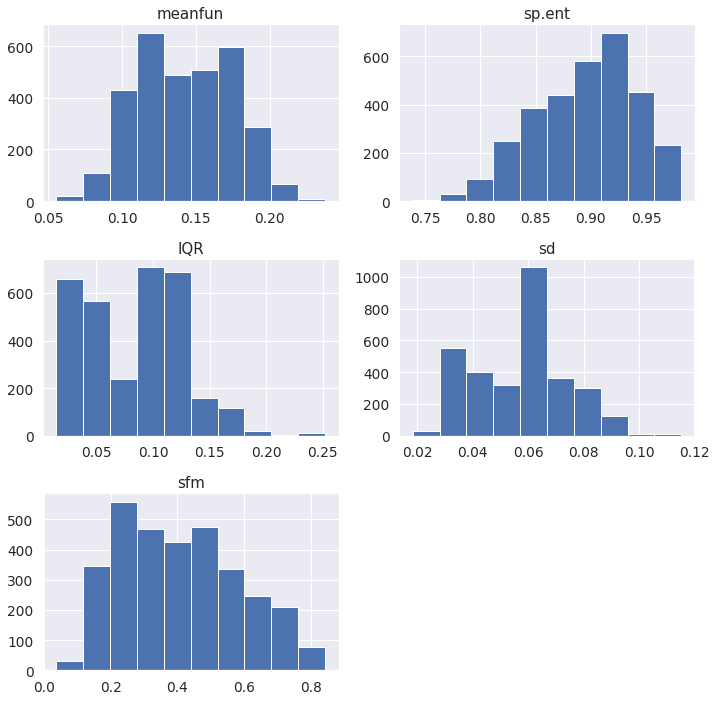

In [9]:
hist = voices[['meanfun', 'sp.ent', 'IQR', 'sd', 'sfm']]

hist.hist(figsize=(10,10)) #plotar scatter para cada um deles
plt.tight_layout()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


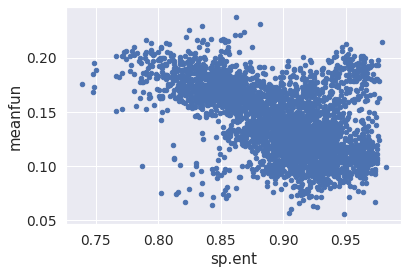

In [10]:
voices.plot('sp.ent','meanfun', kind='scatter');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


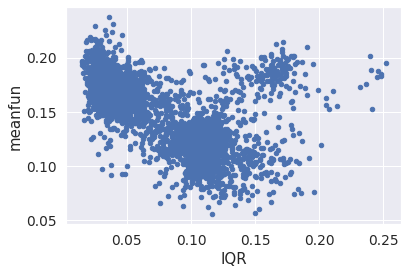

In [11]:
voices.plot('IQR','meanfun', kind='scatter');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


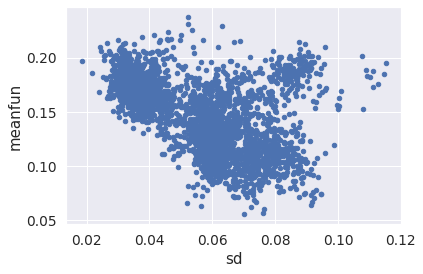

In [12]:
voices.plot('sd','meanfun', kind='scatter');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


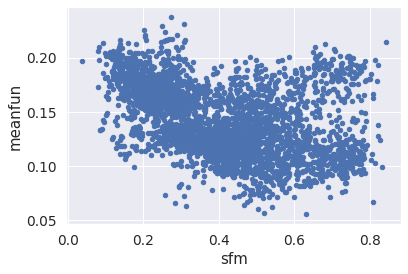

In [13]:
voices.plot('sfm','meanfun', kind='scatter');

## Modelo de Machine Learning 
Chegamos ao nosso objetivo, onde será usado vários modelos de machine learning para verificar como podemos prever quem é do sexo feminino ou  masculino:

### Regressão Logística
para o modelo de Regressão logistica é necessario alguns pacotes da biblioteca `Sklearn` onde serão necessários **para fazer a validação cruzada** do nosso modelo, dando prosseguimento alguns pacotes de medição serão utilizados como `Accuracy_Score`, `Roc_Curve` .....

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import plot_confusion_matrix as skplt
from sklearn.linear_model import LogisticRegression

Iremos executar a separação dos dados de treino e teste

In [15]:
X = voices[['meanfun', 'sp.ent', 'IQR', 'sd', 'sfm']]
y = voices['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)

E por fim treinar o modelo através do método `Predict`

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_prev = model.predict(X_test)
y_prev_prob = model.predict_proba(X_test)

Abaixo alguns resultados bem detalhados como `Precision`, `recall`, `f1-Score`

In [17]:
print(f'Relatório de Classificação: \n{classification_report(y_test, y_prev, digits=4)}')
print(f'Acurácia: {accuracy_score(y_test, y_prev)}')
print(f'AUC: {roc_auc_score(y_test, y_prev)}')

Relatório de Classificação: 
              precision    recall  f1-score   support

           0     0.9695    0.8525    0.9073       373
           1     0.8815    0.9761    0.9264       419

    accuracy                         0.9179       792
   macro avg     0.9255    0.9143    0.9168       792
weighted avg     0.9229    0.9179    0.9174       792

Acurácia: 0.9179292929292929
AUC: 0.9143402842206965


### Decision Tree
Esse modelo se consiste em uma série de opções onde o modelo decide **entre sim ou não** levando para tomadas *decisão condicionais* se parecendo com as **ramificações das Árvores**, no entanto com a divisão de treino e teste o modelo consegue verificar se errou ou acertou nas suas decisões com base nas variáveis que foram passadas,

[Text(0.43902439024390244, 0.9642857142857143, 'X[0] <= 0.139\ngini = 0.5\nsamples = 2376\nvalue = [1211, 1165]'),
 Text(0.1916376306620209, 0.8928571428571429, 'X[2] <= 0.074\ngini = 0.075\nsamples = 1149\nvalue = [45, 1104]'),
 Text(0.09059233449477352, 0.8214285714285714, 'X[4] <= 0.434\ngini = 0.5\nsamples = 52\nvalue = [26, 26]'),
 Text(0.05574912891986063, 0.75, 'X[3] <= 0.043\ngini = 0.415\nsamples = 34\nvalue = [10, 24]'),
 Text(0.041811846689895474, 0.6785714285714286, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.06968641114982578, 0.6785714285714286, 'X[0] <= 0.133\ngini = 0.285\nsamples = 29\nvalue = [5, 24]'),
 Text(0.041811846689895474, 0.6071428571428571, 'X[1] <= 0.883\ngini = 0.153\nsamples = 24\nvalue = [2, 22]'),
 Text(0.027874564459930314, 0.5357142857142857, 'X[1] <= 0.874\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.013937282229965157, 0.4642857142857143, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.041811846689895474, 0.4642857142857143,

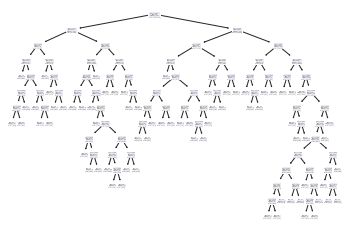

In [18]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

tree.plot_tree(clf)

Para fazer uma análise mais criteriosa do modelo é necessário visualizar o gráfico de tomadas de decisãom para fazer é necesario do pacote graphviz, que o mesmo irá retornar um documento com o gráfico

In [19]:
! pip install graphviz

In [20]:
import graphviz
nov_dat = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(nov_dat)

graph.render('Voices')

'Voices.pdf'

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

prevision = clf.predict(X_test)
conf = confusion_matrix(y_test, prevision)

print(conf)


[[357  16]
 [ 15 404]]


In [22]:
acertos = accuracy_score(y_test, prevision)
acertos

0.9608585858585859

In [23]:
erros = 1 - acertos

erros

0.039141414141414144

### SVM
A SVM coloca em primeiro lugar a **classificação das classes**, definindo assim cada ponto pertencente a cada uma das classes, e em seguida maximiza a margem. Ou seja, ela primeiro classifica as classes corretamente e depois em função dessa restrição define a distância entre as margens.

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

svm = SVC()
svm.fit(X_train, y_train)
prevision = svm.predict(X_test)

In [25]:

taxa_de_acert = accuracy_score(y_test, prevision)

taxa_de_acert

0.9570707070707071

### XGBoost
O XGBoost é baseado em árvore de decisão e que utiliza uma estrutura de Gradient boosting. Em problemas de previsão envolvendo dados não estruturados, como imagens, textos e vídeos, as redes neurais artificiais tendem a superar todos os outros algoritmos ou frameworks.

In [26]:
from xgboost import XGBClassifier

Model = XGBClassifier(
    learning_rate=0.05,
    n_estimators=100,
    max_depth=4,
    subsample= 0.9,
    colsample_bytree= 0.1,
    gamma=1,
    random_state=42
    )

X_train, X_test, y_train, y_test = train_test_split(X, y)

Model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
y_pred = Model.predict(X_test)



In [27]:
# ver performance do algoritmo
print("\nAccuracy Score:")
print (accuracy_score(y_test, y_pred))


Accuracy Score:
0.9532828282828283


### Random Forest
é utilizado para problemas que envolvam classificação ou regressão. Ele se baseia em uma coleção de árvores de decisão em que os são vetores aleatórios independentes e identicamente distribuídos.

In [28]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

forest = RandomForestClassifier(n_estimators= 100)
forest.fit(X_train, y_train)

pred = forest.predict(X_test)

matri = confusion_matrix(y_test, pred)

matri

array([[449,   8],
       [ 10, 484]])

In [29]:
certas = accuracy_score(y_test, pred)

certas

0.9810725552050473

In [30]:
erradas = 1 - certas

erradas

0.018927444794952675

In [31]:
forest.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1765032302),
 DecisionTreeClassifier(max_features='auto', random_state=928035474),
 DecisionTreeClassifier(max_features='auto', random_state=1551494183),
 DecisionTreeClassifier(max_features='auto', random_state=1479224902),
 DecisionTreeClassifier(max_features='auto', random_state=1214817943),
 DecisionTreeClassifier(max_features='auto', random_state=312179362),
 DecisionTreeClassifier(max_features='auto', random_state=1680341561),
 DecisionTreeClassifier(max_features='auto', random_state=361386922),
 DecisionTreeClassifier(max_features='auto', random_state=2024187725),
 DecisionTreeClassifier(max_features='auto', random_state=140173190),
 DecisionTreeClassifier(max_features='auto', random_state=500449552),
 DecisionTreeClassifier(max_features='auto', random_state=1051976371),
 DecisionTreeClassifier(max_features='auto', random_state=1159759861),
 DecisionTreeClassifier(max_features='auto', random_state=1163752248),
 DecisionTr

In [32]:
forest.estimators_[1]

DecisionTreeClassifier(max_features='auto', random_state=928035474)

### Conclusão

Como podemos observar a maioria dos modelo de machine learning performou bem e o resultado realmente foi bem relevante.